In [48]:
import socket
import time
import json
import PIL.Image as Image
import io
import base64
from io import BytesIO
from base64 import decodestring

In [49]:
host, port =  "127.0.0.1" , 8053
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((host,port))

In [50]:
transaction_dict = {
            "MsgType": "Transcation",
            "Version": "0.0.3",
            "InputControlType": "Other",
            "LevelReload": "false",
            "ActiveCamera": 1,
            "IsActive":"true",
            "SunLatitude": -500.39,
            "SunLongitude": -1650.4,
            "SunHour": 16,
            "SunMinute": 5,
            "CaptureScreen": "true",
            "ScreenCaptureType":0
        }


In [51]:
def recvall(sock):
    BUFF_SIZE = 4096 # 4 KiB
    data = b''
    while True:
        part = sock.recv(BUFF_SIZE)
        data += part
        if len(part) < BUFF_SIZE:
            # either 0 or end of data
            break
    return data

In [52]:
for _ in range(100000):
    data = json.dumps(transaction_dict)
    try:    
        sock.sendall(data.encode("utf-8"))
        data = recvall(sock)
        data = eval(data)
        print(len(data["ScreenCapture"]))
    except Exception as e:
        print(">>>>>>>>>>>>",e)
    time.sleep(0.01)

>>>>>>>>>>>> name 'null' is not defined
53960
53960
62808
62808
62808
62808
62956
62956
63236
63236
63028
63028
63252
63252
63252
63028
63028
62864
62864
63068
63068
62816
62816
63180
63180
63180
63184
63184
62900
62900
63340
63340
63004
63004
63256
63256
63176
63204
63204
63204
63288
63288
62940
62940
62780
63040
63040
62824
62824
63264
63264
63360
63360
63360
63264
63264
63148
63148
63148
62964
63020
63020
63016
63016
63148
63148
62936
62936
62936
62860
62860
63324
63324
63208
63208
62828
62828
63088
63088
62940
62940
62940
63048
63048
63048
62844
62844
62844
62920
62920
62940
62940
63076
63076
63020
63020
63148
63148
63148
62668
62668
63216
63216
62788
62788
63008
63008
62852
62852
63008
63008
63140
63140
63116
63116
62788
62788
62988
62988
63056
63056
63056
63120
63120
62736
62736
62736
63220
63220
62832
62832
62972
62972
62976
62976
62952
62952
63124
63124
63124
62792
62792
62712
62712
62868
62868
62988
62988
62928
62928
63152
63152
63152
63376
63376
62952
62952
62552
62552
63268


KeyboardInterrupt: 

In [40]:
data

{'AGL': 0.0,
 'MSL': 4.9548,
 'CurrentRPM': 0.0,
 'MaxRPM': 2500.0,
 'MaxPower': 5000.0,
 'CurrentPower': 0.0,
 'CurrentFuel': 0.0,
 'CurrentSpeed': 0.0116229337,
 'BankAngle': 3.82071781,
 'PitchAngle': 18.6217537,
 'ScreenCapture': 'iVBORw0KGgoAAAANSUhEUgAAAPoAAADICAIAAABOPGvMAAAIOUlEQVR4Ae2d7XKbMBBF47bT93/eznRSWkqGD4OQuGiv0MkfBwKrq7Mniux27NfrQ/z1Ka5HOQhkEDj2+VtGJS6FQOMExLqztDfuw8Pji3V/OC2m1zgBdG+8gcTPIaDUnZ1MDnmuDSCg1D0gPkNCIIcAuufQ4trGCch0ZyfTuAldxJfp3gUtJtk4AY3uLO2Na9BLfI3uvdBinvYEjldedLdvIAF1BAS6H/8+6aJSCQJXCQh0vxqB+yFQiwC61yLNOAYErurOTsagiUQ4S+Cq7mfH4ToIGBBAd4MmEKEWgUu6s5Op1SbG0RC4pLsmAlUgUIsAutcizTgGBNDdoAlEqEWgXHc27rV6xDgyAuW6yyJQCAK1CKB7LdKMY0CgUHd2Mga9I0I2gULds8fhBggYEEB3gyYQoRYBdK9FmnEMCJTozsbdoHFEKCFQonvJONwDAQMC6G7QBCLUIoDutUgzjgGBbN3ZuBt0jQiFBLJ1LxyH2yBgQADdDZpABCmBgw0IuktJU8yAwMGnkeXpfvB7YzBNIkAgQSBP90QxfgwBbwLo7t0f0kkJoLsUJ8W8CWTozsbdu5WkSxPI0D1djCsg4E0A3b37QzopAXSX4qSYNwF09+4P6aQEzurO81QpdorFEDire0w6RoWAlAC6S3FSzJsAunv3h3RSAuguxUkxbwLo7t0f0kkJnNKdl2WkzCkWRuCU7mHpGBgCU

In [41]:
im = Image.open(BytesIO(base64.b64decode(data["ScreenCapture"])))


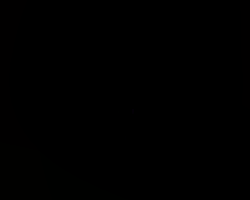

In [42]:
im

In [ ]:
sock.close()